<a href="https://colab.research.google.com/github/usm1ai/Accident_Prediction/blob/main/Accident_GB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [3]:
results_path = r'/content/drive/MyDrive/Accident Prediction/Accidents_GB_2/Results'
base_path = '/content/drive/MyDrive/Accident Prediction/Accidents_GB_2/'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
conn = sqlite3.connect(f'{base_path}/accident_data_v1.0.0_2023.db')
cursor = conn.cursor()
years = pd.read_sql_query("""select * from accident;
                            """, conn)
conn.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
np.unique(np.array(years['accident_year']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2017, 2018, 2019, 2020])

In [6]:
conn = sqlite3.connect(f'{base_path}/accident_data_v1.0.0_2023.db')
cursor = conn.cursor()
dataset = pd.read_sql_query("""select * from accident as a
                            join casualty as c on a.accident_index = c.accident_index
                            join vehicle as v on a.accident_index = v.accident_index
                            join lsoa as l on a.lsoa_of_accident_location = l.lsoa01cd
                            where a.accident_year = 2020;
                            """, conn)

conn.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Sample data (replace this with your actual dataset)
data = dataset['accident_severity']

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the percentage of each accident severity index
severity_counts = df['accident_severity'].value_counts(normalize=True) * 100

# Define labels and values for the pie chart
# labels = ['Fatal', 'Serious', 'Slight']
values = [severity_counts.get(1, 0), severity_counts.get(2, 0), severity_counts.get(3, 0)]

# Define labels, values, and colors for the pie chart
labels = ['Fatal', 'Serious', 'Slight']
# values = [30, 40, 30]
colors = ['red', 'orange', 'peachpuff']  # Specify colors for each slice

# Create a 3D pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3, marker=dict(colors=colors))])


# Update layout
fig.update_layout(
    title_text='Accident Severity Distribution',
    scene=dict(
        aspectmode='cube',
        xaxis=dict(showgrid=True),  # Turn on grid for x-axis
        yaxis=dict(showgrid=True),  # Turn on grid for y-axis
        zaxis=dict(showgrid=True),  # Turn on grid for z-axis
    ),
    width=500,  # Set the width of the figure
    height=500,  # Set the height of the figure
)

fig.write_image(f"{results_path}/3d_pie_chart_without_background.png")
# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead



In [8]:
np.unique(np.array(dataset['number_of_vehicles']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7cc4eee1d120> (for post_execute):


KeyboardInterrupt: 

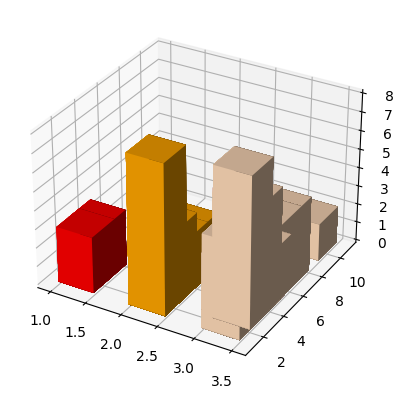

In [13]:
# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors based on accident severity
severity_colors = {1: 'red', 2: 'orange', 3: 'peachpuff'}

# Extract data from the dataframe
x_data = dataset['accident_severity'][:10000]
y_data = dataset['number_of_casualties'][:10000]
z_data = dataset['number_of_vehicles'][:10000]

# Create 3D bars with different colors for each severity
for i in range(len(x_data)):
    ax.bar3d(x_data[i], y_data[i], 0, 0.5, 2, z_data[i], color=severity_colors[x_data[i]], zsort='average')


# Set labels and title
ax.set_xlabel('Accident Severity')
ax.set_ylabel('Number of Casualties')
ax.set_zlabel('Number of Vehicles')
ax.set_title('Accident Severity vs Number of Casualties vs Number of Vehicles')

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



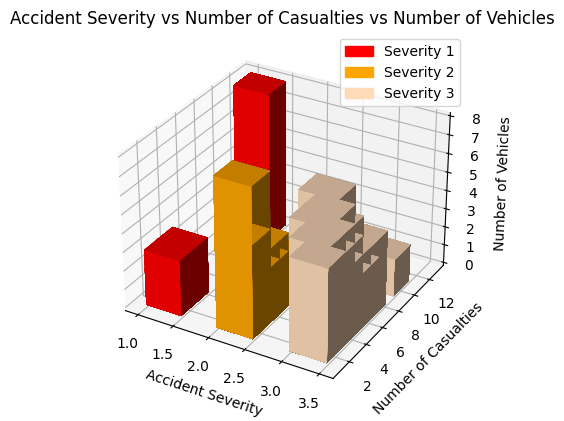

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Define colors based on accident severity
severity_colors = {1: 'red', 2: 'orange', 3: 'peachpuff'}

# Extract data from the dataframe
x_data = dataset['accident_severity'][:10000]
y_data = dataset['number_of_casualties'][:10000]
z_data = dataset['number_of_vehicles'][:10000]

# Create 3D bars with different colors for each severity
for severity in severity_colors:
    indices = (x_data == severity)
    ax.bar3d(x_data[indices], y_data[indices], 0, 0.5, 2, z_data[indices], color=severity_colors[severity], zsort='average')

# Create proxy artists for legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in severity_colors.values()]
legend_labels = ['Severity ' + str(severity) for severity in severity_colors.keys()]

# Add legend
ax.legend(legend_handles, legend_labels)

# Set labels and title
ax.set_xlabel('Accident Severity')
ax.set_ylabel('Number of Casualties')
ax.set_zlabel('Number of Vehicles')
ax.set_title('Accident Severity vs Number of Casualties vs Number of Vehicles')

# Show plot
plt.show()
